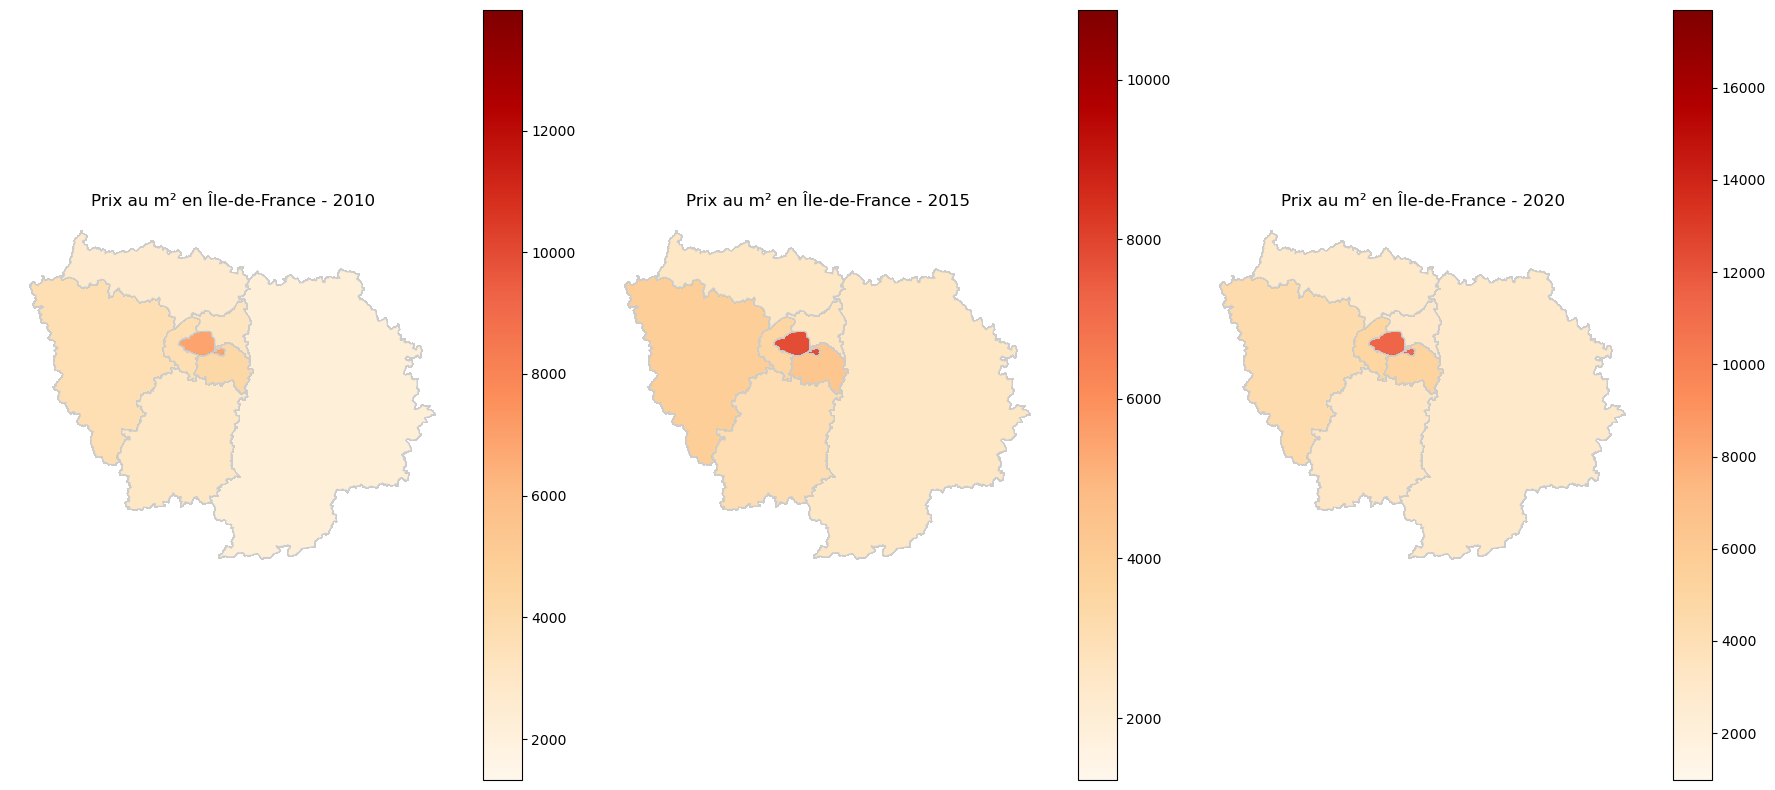

In [13]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Charger le CSV
prix = pd.read_csv("tmp/output.csv")

# Extraire les deux premiers chiffres du code postal pour obtenir le code du département
prix['code_dept'] = prix['codgeo'].astype(str).str[:2]

# Charger le shapefile des départements
carte = gpd.read_file("input/DEPARTEMENT/DEPARTEMENT.shp")

# Filtrer pour garder uniquement l'Île-de-France (codes des départements de l'IDF)
idf_codes = ['75', '77', '78', '91', '92', '93', '94', '95']
carte = carte[carte['INSEE_DEP'].isin(idf_codes)]

# Fusionner les données de prix avec la carte géographique
gdf = carte.merge(prix, left_on='INSEE_DEP', right_on='code_dept')

# Années que nous voulons afficher
years = [2010, 2015, 2020]

# Créer une figure pour afficher les cartes
fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # 1 ligne, 3 colonnes

# Afficher les cartes pour chaque année
for i, year in enumerate(years):
    gdf_year = gdf[gdf['year'] == year]
    gdf_year.plot(column='pxm2_median_cod111', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=axes[i])
    axes[i].set_title(f"Prix au m² en Île-de-France - {year}", fontsize=12)
    axes[i].axis('off')  # Masquer les axes

# Afficher la figure
plt.tight_layout()
plt.show()

# Sauvegarder l'image dans le dossier 'output'
output_path = f"output/prix_m2_idf_{year}.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ Carte pour {year} enregistrée : {output_path}")

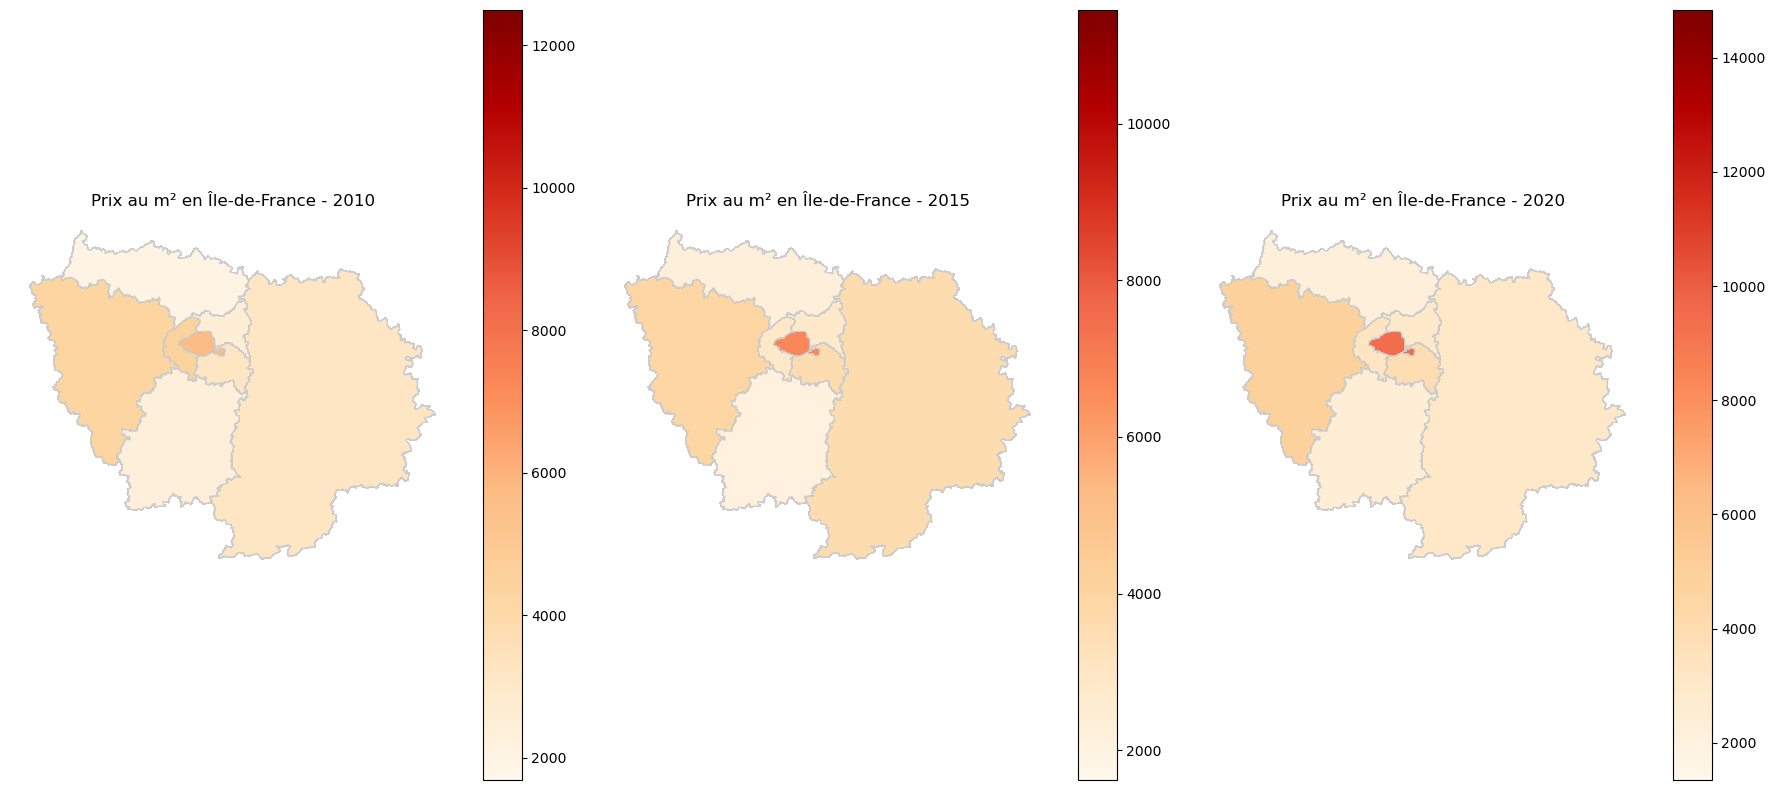

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Charger le CSV
prix = pd.read_csv('output.csv')

# Extraire les deux premiers chiffres du code postal pour obtenir le code du département
prix['code_dept'] = prix['codgeo'].astype(str).str[:2]

# Charger le shapefile des départements
carte = gpd.read_file("DEPARTEMENT/DEPARTEMENT.shp")

# Filtrer pour garder uniquement l'Île-de-France (codes des départements de l'IDF)
idf_codes = ['75', '77', '78', '91', '92', '93', '94', '95']
carte = carte[carte['INSEE_DEP'].isin(idf_codes)]

# Fusionner les données de prix avec la carte géographique
gdf = carte.merge(prix, left_on='INSEE_DEP', right_on='code_dept')

# Années que nous voulons afficher
years = [2010, 2015, 2020]

# Créer une figure pour afficher les cartes
fig, axes = plt.subplots(1, 3, figsize=(18, 8))  # 1 ligne, 3 colonnes

# Afficher les cartes pour chaque année
for i, year in enumerate(years):
    gdf_year = gdf[gdf['year'] == year]
    gdf_year.plot(column='pxm2_median_cod121', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=axes[i])
    axes[i].set_title(f"Prix au m² en Île-de-France - {year}", fontsize=12)
    axes[i].axis('off')  # Masquer les axes

# Afficher la figure
plt.tight_layout()
plt.show()

